In [79]:
import os
from pydub import AudioSegment

# This function takes in the session folder, unzipped, as the input

# Here is the full filepath it is actually taking:
# 'Documents/Revising Honors Project/test_session-67d9_data'
# But as the function parameter input, it should just be 'test_session-67d9_data'
# because this notebook is already inside the Revising Honors Project folder

# It creates another folder inside the session folder, here 'test_session-67d9_data'
# called 'audio_wav', with all the required files preprocessed and all the files
# that did not need the preprocessing get skipped for efficiency.


def convert_audio_to_wav(session_folder):
    
    audio_folder = os.path.join(session_folder, 'audio')
    output_folder = os.path.join(session_folder, 'audio_wav')
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(audio_folder):
        if not filename.lower().endswith(('.mp4', '.ogg')):
            continue

        input_path = os.path.join(audio_folder, filename)
        output_filename = os.path.splitext(filename)[0] + '.wav'
        output_path = os.path.join(output_folder, output_filename)

        if os.path.exists(output_path):
            print(f"Skipping (already converted): {output_filename}")
            continue

        try:
            audio = AudioSegment.from_file(input_path)
            audio = audio.set_channels(1)  # mono
            audio.export(output_path, format='wav')
            print(f"Converted: {filename} → {output_filename}")
        except Exception as e:
            print(f"Error converting {filename}: {e}")


In [80]:
import os
from pydub import AudioSegment

session_folder = 'test_session-67d9_data'
input_audio_folder = os.path.join(session_folder, 'audio')
print(input_audio_folder)
output_audio_folder = os.path.join(session_folder, 'audio_wav')
print(output_audio_folder)
print(type(output_audio_folder))
os.makedirs(output_audio_folder, exist_ok = True)


'''Okay, that makes sense. I want to write a function that will take in the string 
'session-67d94e1a42f12a9364065df2-data' as the parameter session_folder, find the 
folder called 'audio' inside it, and go through each audio file, converting it to 
mono and wav and save it to audio_wav. This function should only convert files that 
have not already been converted, and should save the audio files with the same 
names, just ending with a .wav.'''

for i in os.listdir(input_audio_folder):
    print(i)
    print('full input path =')
    full_input_path = '{input_audio_folder}/{i}'.format(input_audio_folder = input_audio_folder, i = i)
    print(full_input_path)
    print(not i.endswith('.wav'))
    print()
    file_path_without_extension = i[0:-4]
    print(file_path_without_extension)
    file_path_with_wav = '{output_folder}/{path}.wav'.format(
        output_folder = output_audio_folder,
        path = file_path_without_extension)
    print(file_path_with_wav)
    print(f'does this path exist {os.path.exists('file_path_with_wav')}')
    if os.path.exists(file_path_with_wav):
        print('Wav converted file exists')
    else:
        try:
            audio = AudioSegment.from_file('{input_audio_folder}/{i}'.format(input_audio_folder = input_audio_folder, i = i))
            audio.export(f'{file_path_with_wav}')
            print(f"Audio file: \n {file_path_with_wav} converted to wav")
        except Exception as e:
            print("Error converting {filename}: {e}".format(filename = full_input_path, e = e))

    print('''

    

    ''')

# ok so what i want to check here is
# look in input folder for name.anything_but_wav
# check same thing in output folder for .wav
# if exists, don't make it
# if it doesn't exist, make it!

test_session-67d9_data/audio
test_session-67d9_data/audio_wav
<class 'str'>
53c7dbc41f259d6f7157d364-17-LocPromptResp31.mp4
full input path =
test_session-67d9_data/audio/53c7dbc41f259d6f7157d364-17-LocPromptResp31.mp4
True

53c7dbc41f259d6f7157d364-17-LocPromptResp31
test_session-67d9_data/audio_wav/53c7dbc41f259d6f7157d364-17-LocPromptResp31.wav
does this path exist False
Wav converted file exists


    

    
53c7dbc41f259d6f7157d364-14-LocPromptResp18.mp4
full input path =
test_session-67d9_data/audio/53c7dbc41f259d6f7157d364-14-LocPromptResp18.mp4
True

53c7dbc41f259d6f7157d364-14-LocPromptResp18
test_session-67d9_data/audio_wav/53c7dbc41f259d6f7157d364-14-LocPromptResp18.wav
does this path exist False
Wav converted file exists


    

    
53c7dbc41f259d6f7157d364-15-ExpPromptResp5.mp4
full input path =
test_session-67d9_data/audio/53c7dbc41f259d6f7157d364-15-ExpPromptResp5.mp4
True

53c7dbc41f259d6f7157d364-15-ExpPromptResp5
test_session-67d9_data/audio_wav/53c7dbc41f259d6f7157d

In [81]:
ex_path = 'test_session-67d9_data/audio/53c7dbc41f259d6f7157d364-12-ExpPromptResp10.mp4'

audio_ex = AudioSegment.from_file(ex_path)

audio_ex_noext = os.path.splitext(ex_path)[0]
print(audio_ex_noext)

os.makedirs('test_session-67d9_data/audio_new_trial', exist_ok=True)
new_path = os.path.join(audio_ex_noext, 'wav')
print(new_path)

#audio_ex.export(f'{new_path}.wav', format = 'wav')

test_session-67d9_data/audio/53c7dbc41f259d6f7157d364-12-ExpPromptResp10
test_session-67d9_data/audio/53c7dbc41f259d6f7157d364-12-ExpPromptResp10/wav


In [105]:
file_path_with_wav

'/Users/oishanibandopadhyay/Documents/Revising Honors Project/test_session-67d9_data/audio_wav/53c7dbc41f259d6f7157d364-16-HardPromptResp7'

In [122]:
def session_audio_to_wav(session_name):

    # finding audio folder inside session-xyz_data folder, not the audio folder inside it
    input_audio_folder = os.path.join(session_name, 'audio')
    
    # creating new folder for output pre-processed wav files in session-xyz_data folder
    output_audio_folder = os.path.join(session_name, 'audio_wav')
    os.makedirs(output_audio_folder, exist_ok = True)
    
    # iterating through input audio folder
    for i in os.listdir(input_audio_folder):
        # each audio file's full input path
        #full_input_path = f'{input_audio_folder}/{i}'
        full_input_path = os.path.join(input_audio_folder, i)

        # check if file is empty or too small to be processed
        if os.path.getsize(full_input_path) < 1024:
            print(f'\n Input audio file too small or empty: {full_input_path} \n')
            continue

        # checking if the audio file ends with .wav already
        file_path_without_extension = os.path.splitext(i)[0]
        file_path_with_wav = '{output_folder}/{path}.wav'.format(
            output_folder = output_audio_folder,
            path = file_path_without_extension)

        if os.path.exists(file_path_with_wav):
            print(f'Wav converted file exists at: {file_path_with_wav}')

        # if .wav version of input file does not exist in audio_wav folder, make it
        else:
            try:
                # using AudioSegment from pydub to get the audio from the input file
                audio = AudioSegment.from_file(os.path.join(input_audio_folder, i))

                # covert all audio files to mono (accounts for earphone recordings
                # which can have stereo audio or more than one channel)
                audio.set_channels(1)
                
                # sending the audio file converted to wav to the previously named wav filepath
                audio.export(f'{file_path_with_wav}')
                print(f"Audio file converted successfully: \n {file_path_with_wav}")

            # handle errors with the files, printing only the last line of the error
            except Exception as e:
                print(f'Error converting {full_input_path}: {e}')

# Testing
session_audio_to_wav('/Users/oishanibandopadhyay/Documents/Revising Honors Project/test_session-67d9_data')

Wav converted file exists at: /Users/oishanibandopadhyay/Documents/Revising Honors Project/test_session-67d9_data/audio_wav/53c7dbc41f259d6f7157d364-17-LocPromptResp31.wav
Wav converted file exists at: /Users/oishanibandopadhyay/Documents/Revising Honors Project/test_session-67d9_data/audio_wav/53c7dbc41f259d6f7157d364-14-LocPromptResp18.wav
Wav converted file exists at: /Users/oishanibandopadhyay/Documents/Revising Honors Project/test_session-67d9_data/audio_wav/53c7dbc41f259d6f7157d364-15-ExpPromptResp5.wav
Wav converted file exists at: /Users/oishanibandopadhyay/Documents/Revising Honors Project/test_session-67d9_data/audio_wav/53c7dbc41f259d6f7157d364-13-DialPromptResp3.wav
Wav converted file exists at: /Users/oishanibandopadhyay/Documents/Revising Honors Project/test_session-67d9_data/audio_wav/53c7dbc41f259d6f7157d364-12-ExpPromptResp10.wav
Wav converted file exists at: /Users/oishanibandopadhyay/Documents/Revising Honors Project/test_session-67d9_data/audio_wav/53c7dbc41f259d6f7

In [123]:
from pydub import AudioSegment


In [124]:
convert_audio_to_wav('test_session-67d9_data')

Skipping (already converted): 53c7dbc41f259d6f7157d364-17-LocPromptResp31.wav
Skipping (already converted): 53c7dbc41f259d6f7157d364-14-LocPromptResp18.wav
Skipping (already converted): 53c7dbc41f259d6f7157d364-15-ExpPromptResp5.wav
Skipping (already converted): 53c7dbc41f259d6f7157d364-13-DialPromptResp3.wav
Skipping (already converted): 53c7dbc41f259d6f7157d364-12-ExpPromptResp10.wav
Skipping (already converted): 53c7dbc41f259d6f7157d364-16-HardPromptResp7.wav


(263277,)


<Figure size 640x480 with 0 Axes>

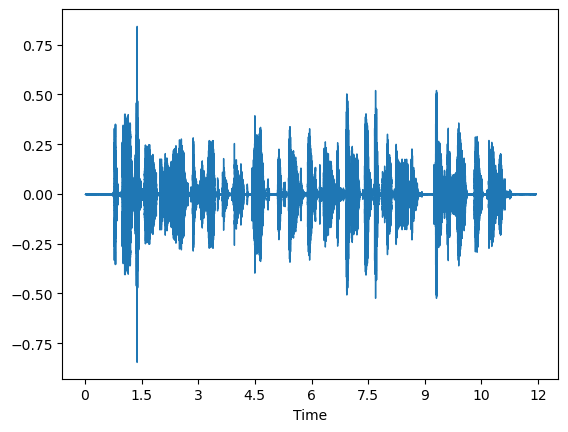

<Figure size 640x480 with 0 Axes>

In [125]:
#waveform visualization just for funsies

import librosa
import matplotlib.pyplot as plt
import librosa.display
x, sr = librosa.load('test_session-67d9_data/audio_wav/53c7dbc41f259d6f7157d364-12-ExpPromptResp10.wav')

print(x.shape)

librosa.display.waveshow(x, sr=sr)
plt.figure()

In [126]:
from IPython.display import Audio
x, sr = librosa.load('test_session-67d9_data/audio_wav/53c7dbc41f259d6f7157d364-12-ExpPromptResp10.wav')
Audio(data=x, rate=sr)

In [127]:
# transcription functions

In [ ]:
import os
from openai import OpenAI
